# Project: Investigate a Dataset (TMDb Movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Dataset  consistes of  21 columns and 10866 rows.
Data types of columns: float64(4 columns), int64(6 columns), object(11 columns)
There are 9512 unique movie titles, 4505 unique director names, and 7406 production companies.
the database contains movies that were produced from 1960 to 2015.

### Questions asked: <hr>
* what is line of production by years <hr>
*Is Budget related to popularity? <hr>
*Does runtime affect popularity? <hr>
*what is the relationship between revenue , popularity and budget ? <hr>
*who are the most important directors that achieve the most popular movies? <hr>
*what is leading production companies in the industry? <hr>
*what genre is most produced? <hr>

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At 

In [153]:
# import statements for all of the packages that used
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [123]:
# Loadind and inspecting data and 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [124]:
# Explore types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [125]:
# Explore duplicated rows
df.duplicated().sum()

1

In [126]:
# Explore unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [127]:
# Explore characteristics of columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are some columns will not be used in analysis('imdb_id','homepage','tagline','keywords','overview')
There are one duplicated row.
There are missing values in some columns
There are meaningless zero values in budjet, revenu and runtime


### Data Cleaning 
1.drop unnecessary columns
2.drop duplicated row
3.drop null values 
4.drop zero values in budjet, revenu and runtime.

In [128]:
# drop unnecessary columns
df.drop(['imdb_id','homepage','tagline','keywords','overview'],axis=1,inplace=True)

In [129]:
df.shape

(10866, 16)

In [130]:
# drop duplicated row
df.drop_duplicates(inplace=True)

In [131]:
df.duplicated().sum()

0

In [132]:
# drop null values
df.dropna(inplace=True)

In [133]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [134]:
# drop zero values
df.drop(df.loc[df['budget']==0].index, inplace=True)
df.drop(df.loc[df['revenue']==0].index, inplace=True)
df.drop(df.loc[df['runtime']==0].index, inplace=True)

In [135]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E863940>,
      dtype=object)

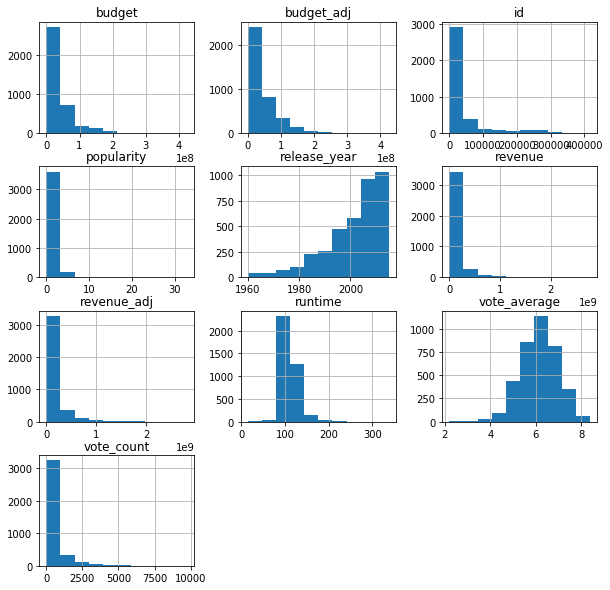

In [136]:
df.hist(figsize=(10,10))


### Research Question 1 * what is line of production by years <hr>

Text(0,0.5,'movies count')

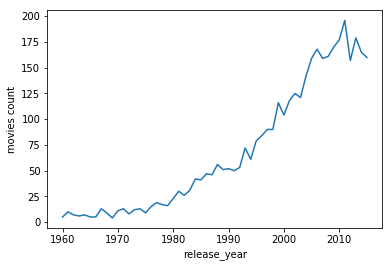

In [176]:
#   group years to visulize the line of production
df_Year=df.groupby('release_year').release_year.count()
year_plt=df_Year.plot.line()
year_plt.set_ylabel("movies count")

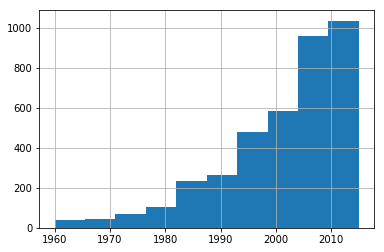

In [171]:
df['release_year'].hist()

### Research Question 2  *Is Budget related to popularity? <hr>

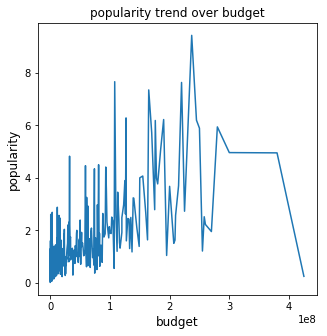

In [184]:
#Is the popularity related to  budget ?
year_pop=df.groupby('budget')['popularity'].mean()
year_pop.plot(title='popularity trend over budget',alpha=1,figsize=(5,5))
plt.xlabel('budget',fontsize=12)
plt.ylabel('popularity',fontsize=12)

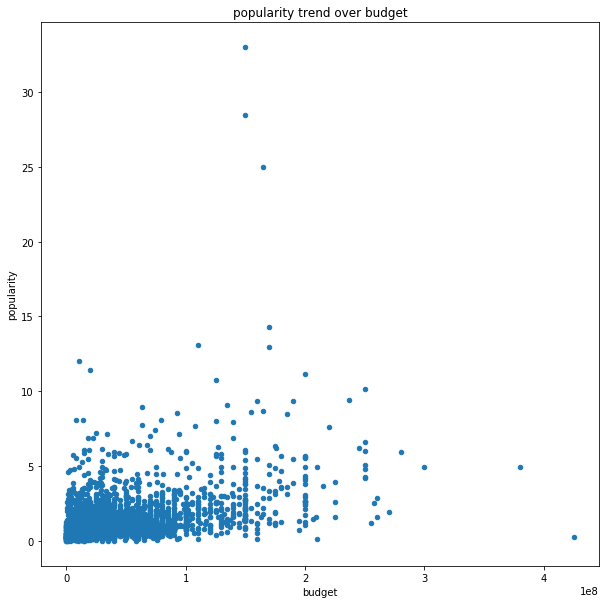

In [190]:
df[['budget','popularity']].plot(kind='scatter',x='budget', y='popularity',title='popularity trend over budget',alpha=1,figsize=(10,10))

### Research Question 3 *Does runtime affect popularity? <hr>


Text(0,0.5,'popularity')

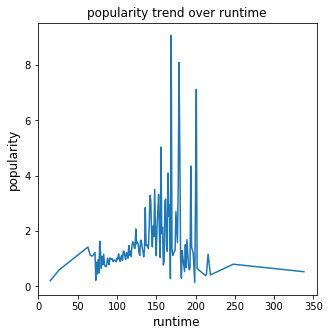

In [189]:
#Is the popularity related to runtime ?
year_pop=df.groupby('runtime')['popularity'].mean()
year_pop.plot(title='popularity trend over runtime',alpha=1,figsize=(5,5))
plt.xlabel('runtime',fontsize=12)
plt.ylabel('popularity',fontsize=12)

### Research Question 4 *what is the relationship between  popularity and vote_average? <hr>


Text(0,0.5,'popularity')

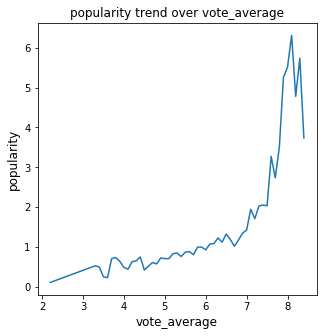

In [141]:
#Is the popularity related to vote_average ?
year_pop=df.groupby('vote_average')['popularity'].mean()
year_pop.plot(title='popularity trend over vote_average',alpha=1,figsize=(5,5))
plt.xlabel('vote_average',fontsize=12)
plt.ylabel('popularity',fontsize=12)

### Research Question 5 *who are the most important directors that achieve the most popular movies? <hr>


In [142]:
vc=df['director'].value_counts()
most_prod=vc[vc >= 10]
most_prod_col=most_prod.values
most_prod_col

array([27, 24, 21, 18, 17, 17, 16, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13,
       12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10], dtype=int64)

In [195]:
df_dir=df.groupby('director')['popularity'].mean()
df_dir=df_dir[most_prod.index]
most_dir_col=df_dir.values
most_dir_col

array([1.97984311, 0.99943637, 2.15172633, 0.68111533, 1.078856  ,
       1.73385665, 2.11761619, 0.76562973, 1.01230527, 2.14379007,
       0.78934927, 1.69921957, 0.65194243, 1.00987671, 1.09766429,
       1.47908346, 1.14763246, 0.73292108, 0.84631583, 0.74054858,
       1.0428015 , 2.02317036, 4.38220009, 0.980503  , 0.64990227,
       0.90548236, 1.7485876 , 0.6566068 , 1.0419186 , 1.3183141 ,
       0.5749485 , 1.0508797 , 3.4479784 , 1.4282788 , 0.8622713 ,
       1.2569984 , 1.1248722 , 1.0960254 ])

In [144]:
cm= pd.DataFrame ({'director': most_prod_col , 'popularity':most_dir_col},index=most_prod.index)
cm


,director,popularity
Steven Spielberg,27,1.979843
Clint Eastwood,24,0.999436
Ridley Scott,21,2.151726
Woody Allen,18,0.681115
Steven Soderbergh,17,1.078856
Martin Scorsese,17,1.733857
Tim Burton,16,2.117616
Renny Harlin,15,0.765630
Brian De Palma,15,1.012305
Robert Zemeckis,15,2.143790


### Research Question 6 *what is leading production companies in the industry? 


In [146]:
vc=df['production_companies'].value_counts()
most_cm_prod=vc[vc >= 10]
most_cm_prod

Paramount Pictures                                    77
Universal Pictures                                    57
Columbia Pictures                                     39
New Line Cinema                                       38
Warner Bros.                                          33
Metro-Goldwyn-Mayer (MGM)                             26
Touchstone Pictures                                   24
Twentieth Century Fox Film Corporation                23
Walt Disney Pictures                                  22
20th Century Fox                                      22
Miramax Films                                         17
Orion Pictures                                        17
Dimension Films                                       16
Columbia Pictures Corporation                         16
TriStar Pictures                                      15
United Artists                                        15
DreamWorks Animation                                  15
Walt Disney Pictures|Pixar Anim

In [147]:

df_cm=df.groupby('production_companies')['popularity'].mean()
df_cm=df_cm[most_cm_prod.index]
df_cm

Paramount Pictures                                    0.873188
Universal Pictures                                    0.669668
Columbia Pictures                                     0.849457
New Line Cinema                                       0.816173
Warner Bros.                                          0.829843
Metro-Goldwyn-Mayer (MGM)                             0.638193
Touchstone Pictures                                   0.677981
Twentieth Century Fox Film Corporation                0.722115
Walt Disney Pictures                                  1.322252
20th Century Fox                                      0.692946
Miramax Films                                         0.666078
Orion Pictures                                        0.625379
Dimension Films                                       0.642095
Columbia Pictures Corporation                         0.703489
TriStar Pictures                                      0.599546
United Artists                                        0

In [196]:
cp= pd.DataFrame ({'company': most_cm_prod.values , 'popularity':df_cm.values}, index=most_cm_prod.index)
cp


,company,popularity
Paramount Pictures,77,0.873188
Universal Pictures,57,0.669668
Columbia Pictures,39,0.849457
New Line Cinema,38,0.816173
Warner Bros.,33,0.829843
Metro-Goldwyn-Mayer (MGM),26,0.638193
Touchstone Pictures,24,0.677981
Twentieth Century Fox Film Corporation,23,0.722115
Walt Disney Pictures,22,1.322252
20th Century Fox,22,0.692946


In [150]:
df[df['popularity']==df['popularity'].max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### what is range of budget?

### Research Question 7 *what genre is most produced? <hr>

In [152]:
df.genres.value_counts()

Drama                                             243
Comedy                                            230
Drama|Romance                                     106
Comedy|Romance                                    103
Comedy|Drama|Romance                               87
Comedy|Drama                                       85
Horror|Thriller                                    80
Horror                                             57
Drama|Thriller                                     47
Action|Thriller                                    39
Crime|Drama|Thriller                               37
Drama|Comedy                                       36
Comedy|Family                                      32
Action|Crime|Thriller                              31
Drama|Crime                                        27
Drama|History                                      27
Crime|Drama                                        26
Drama|Comedy|Romance                               25
Thriller                    

<a id='conclusions'></a>
## Conclusions

The analysis concludes the following:
#1-The movie production increases steadily since 1960, which means that the movie industry is improving and popular demand.
#2-there is no relationship between budget and popularity, which means a high budget is not the factor of a successful movie.
#3- the vote average increases by popularity.
#4-the most popularity of movies goes to those with runtime between 150 and 200 minutes.
#5-The director who produced most movies is 'Steven Spielberg' and the mean popularity of his movies is not the top, that means there is no relationship between more movie production of director and popularity.
#6- Analysis shows the The production company which produced most movies is 'Paramount Pictures' 
#7-MOst produced genres are Drama,Comedy,Drama|Romance,Comedy|Romance,Comedy|Drama|Romance,Comedy|Drama,Horror|Thriller,Horror